# Splitting the Dataset

Splitting your dataset is a critical step in building a machine learning model. It ensures that the model is trained on one portion of the data and tested on another, which helps to evaluate the model's performance on unseen data.

---

## Table of Contents

1. [Introduction to Dataset Splitting](#1-introduction-to-dataset-splitting)
2. [Train-Test Split](#2-train-test-split)
3. [Train-Validation-Test Split](#3-train-validation-test-split)
4. [Stratified Splitting for Imbalanced Data](#4-stratified-splitting-for-imbalanced-data)
5. [Visualizing the Split](#5-visualizing-the-split)

---

## 1. Introduction to Dataset Splitting

It is essential to split the dataset into separate training and testing sets to avoid overfitting and to check the generalization of the model.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("categorical_data.csv")
data.drop(columns=["ID"],axis=1,inplace=True)
data.head()

,Product_Name,Category,Region,Price,Sales,Discount_Percentage,Customer_Rating
0,Product_1,Furniture,South,870.28,6451,13.86,4.5
1,Product_2,Books,South,525.13,7745,39.55,3.6
2,Product_3,Furniture,West,809.60,8295,43.45,2.6
3,Product_4,Books,South,953.33,7416,49.26,1.9
4,Product_5,Food,North,363.77,9391,19.13,2.0


In [3]:
X = data.drop(columns=["Sales"])
y = data["Sales"]

In [4]:
print("Features:\n", X.head())
print("\nTarget:\n", y.head())

Features:
   Product_Name   Category Region   Price  Discount_Percentage  Customer_Rating
0    Product_1  Furniture  South  870.28                13.86              4.5
1    Product_2      Books  South  525.13                39.55              3.6
2    Product_3  Furniture   West  809.60                43.45              2.6
3    Product_4      Books  South  953.33                49.26              1.9
4    Product_5       Food  North  363.77                19.13              2.0

Target:
 0    6451
1    7745
2    8295
3    7416
4    9391
Name: Sales, dtype: int64


In this step, we should have converted the non-numeric lines to numeric using the label encoder, but since we are not going to do a real training right now, we are skipping it.

## 2. Train-Test Split

The most common splitting method is dividing the dataset into a training set (to train the model) and a test set (to evaluate the model).

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (160, 6)
Testing data shape: (40, 6)


The training set is used to train the model, while the test set is reserved for evaluation.

## 3. Train-Validation-Test Split

In some cases, it is helpful to further split the training set into a validation set. The validation set can be used to tune model parameters and avoid overfitting before evaluating on the test set.

In [6]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=.2,random_state=42)

X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=.5,random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (160, 6)
Validation data shape: (20, 6)
Testing data shape: (20, 6)


## 4. Stratified Splitting for Imbalanced Data

When working with imbalanced datasets (e.g., many more instances of one class than another), it's important to use stratified splitting. This ensures that both the training and test sets maintain the same proportion of classes.

In [ ]:
#This code will not work with the data set you have, 
#I suggest you investigate the reason and continue on your way.

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

print("Original class distribution:", np.bincount(y))
print("Training set class distribution:", np.bincount(y_train))
print("Test set class distribution:", np.bincount(y_test))

Stratified splitting ensures that the class distribution in both sets is representative of the overall data.

## 5. Visualizing the Split

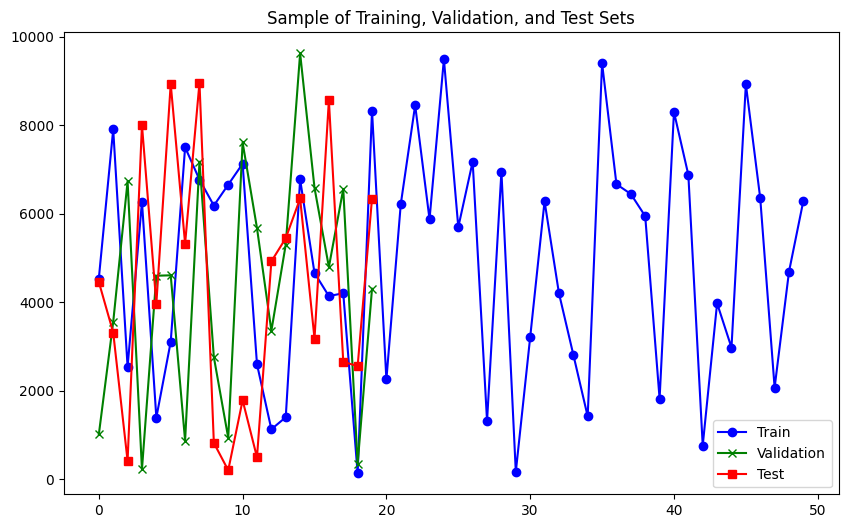

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(50), y_train[:50], label='Train', color='blue', marker='o')
plt.plot(range(20), y_val[:20], label='Validation', color='green', marker='x')
plt.plot(range(20), y_test[:20], label='Test', color='red', marker='s')
plt.title("Sample of Training, Validation, and Test Sets")
plt.legend()
plt.show()